# CoinMarketAPI

### What is the CoinMarketCap API?

The CoinMarketCap API is a method to retrieve cryptocurrency data such as price, volume, market cap, and exchange data from CoinMarketCap using code.

The website of the CMC is free to use and the payment is necessary if you want more API functions.

CoinMarketCap API offers a free plan among the other 4 available ones. With the free plan you have access to the 9 market data endpoints:

Crypto referential and info logo and logo assets
- Latest Global Market cap, volume and stats

- Latest crypto rankings and market quotes

- Latest crypto and flat currency conversions

- Partner data access

The number of free CMC API call credits per month is 10k and, with the other paid packages, it can even go up to 3 million or more.

### Why should I use CoinMarketCap?
- Has a free plan
- Easy to use
- Informative
- Tracks a great number of coins and exchanges
- Has a mobile APP
- Good API

### How to get started with CoinMarketCap API?
In order to get started with the CoinMarketCap API you’ll need to obtain your API key from the following link:

https://coinmarketcap.com/api/

For this tutorial we’ll be using Python, so let’s go over and install the CoinMarketCap library with the following command:

`pip install python-coinmarketcap`

The main cryptocurrency endpoints that the CMC offers us are the following:

- Metadata
- Historical listings
- Historical quotes
- Historical OHLCV
- CMC ID Map
- Latest Quotes
- Latest Listings
- Latest Market Pairs
- Latest OHLCV
- Price performance stats

import the CMC library and set the client up.

In [1]:
ApiKey= '22a70ee5-7614-4e07-ad3d-11410bb15cb0'
from coinmarketcapapi import CoinMarketCapAPI, CoinMarketCapAPIError
cmc = CoinMarketCapAPI(ApiKey)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import json
from IPython.core.display import HTML
import requests

### How to get the ID Map data with CoinMarketCap API?

The CMC ID Map endpoint obtains a mapping of all currencies with their unique ID’s. Each currency obtained by this endpoint will return standard identifiers as name, symbol and token address.

The data obtained will provide the first and last historical data timestamps

In [3]:
data_id_map= cmc.cryptocurrency_map()
data_id_map

RESPONSE: 1196ms OK: [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'rank': 1, 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:21.000Z', 'last_historical_data': '2021-11-23T06:39:02.000Z', 'platform': None}, {'id': 2, 'name': 'Litecoin', 'symbol': 'LTC', 'slug': 'litecoin', 'rank': 15, 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:22.000Z', 'last_historical_data': '2021-11-23T06:39:02.000Z', 'platform': None}, {'id': 3, 'name': 'Namecoin', 'symbol': 'NMC', 'slug': 'namecoin', 'rank': 800, 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:22.000Z', 'last_historical_data': '2021-11-23T06:39:02.000Z', 'platform': None}, {'id': 4, 'name': 'Terracoin', 'symbol': 'TRC', 'slug': 'terracoin', 'rank': 2107, 'is_active': 1, 'first_historical_data': '2013-04-28T18:47:22.000Z', 'last_historical_data': '2021-11-23T06:39:03.000Z', 'platform': None}, {'id': 5, 'name': 'Peercoin', 'symbol': 'PPC', 'slug': 'peercoin', 'rank': 803, 'is_active': 1, 'fir

Make the data more readable by putting it into a pandas data frame. For this, you need to do the following:

In [4]:
data_id_map_pd = pd.DataFrame(data_id_map.data, columns =['name','symbol'])
#pd.set_index('symbol',inplace=True)
print(data_id_map_pd)

                        name  symbol
0                    Bitcoin     BTC
1                   Litecoin     LTC
2                   Namecoin     NMC
3                  Terracoin     TRC
4                   Peercoin     PPC
...                      ...     ...
7617             BinanceHODL  BiHODL
7618       Axus Coin Project    AXUS
7619              Roar Token    ROAR
7620  Dragon Mainland Shards     DMS
7621            R U Generous     RUG

[7622 rows x 2 columns]


### How to get quote data using CoinMarketCap API?
The CMC quote data endpoint returns the latest market quote for a specified cryptocurrency. Moreover, we can convert this data easily into a wanted currency.

In [5]:
data_quote = cmc.cryptocurrency_quotes_latest(symbol='ETH', convert='USD')
data_quote.data

##By using url
#var url=https://pro-api.coinmarketcap.com/v1/cryptocurrency/quotes/latest?symbol=ETH

{'ETH': {'id': 1027,
  'name': 'Ethereum',
  'symbol': 'ETH',
  'slug': 'ethereum',
  'num_market_pairs': 4668,
  'date_added': '2015-08-07T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'smart-contracts',
   'ethereum-ecosystem',
   'binance-smart-chain',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'hashkey-capital-portfolio',
   'kinetic-capital',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio'],
  'max_sup

Make the data more readable by json normalizing

In [6]:
jsondata= pd.json_normalize(data_quote.data)
jsondata.T
#data_quote_pd= pd.DataFrame(data_quote.data['ETH'],columns=data_quote.data['ETH'].keys())

,0
ETH.id,1027
ETH.name,Ethereum
ETH.symbol,ETH
ETH.slug,ethereum
ETH.num_market_pairs,4668
ETH.date_added,2015-08-07T00:00:00.000Z
ETH.tags,"[mineable, pow, smart-contracts, ethereum-ecos..."
ETH.max_supply,None
ETH.circulating_supply,118452643.0615
ETH.total_supply,118452643.0615


### How to get the latest listing data using CoinMarketCap API

The CMC latest listings endpoint obtains a list of all active cryptocurrencies with their latest market data.



In [7]:
data_latest = cmc.cryptocurrency_listings_latest()
data_latest.data
#url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

[{'id': 1,
  'name': 'Bitcoin',
  'symbol': 'BTC',
  'slug': 'bitcoin',
  'num_market_pairs': 8321,
  'date_added': '2013-04-28T00:00:00.000Z',
  'tags': ['mineable',
   'pow',
   'sha-256',
   'store-of-value',
   'state-channel',
   'coinbase-ventures-portfolio',
   'three-arrows-capital-portfolio',
   'polychain-capital-portfolio',
   'binance-labs-portfolio',
   'blockchain-capital-portfolio',
   'boostvc-portfolio',
   'cms-holdings-portfolio',
   'dcg-portfolio',
   'dragonfly-capital-portfolio',
   'electric-capital-portfolio',
   'fabric-ventures-portfolio',
   'framework-ventures-portfolio',
   'galaxy-digital-portfolio',
   'huobi-capital-portfolio',
   'alameda-research-portfolio',
   'a16z-portfolio',
   '1confirmation-portfolio',
   'winklevoss-capital-portfolio',
   'usv-portfolio',
   'placeholder-ventures-portfolio',
   'pantera-capital-portfolio',
   'multicoin-capital-portfolio',
   'paradigm-portfolio'],
  'max_supply': 21000000,
  'circulating_supply': 18880775,
  '

#### Creating lists for some data points

In [8]:
names= [i['name'] for i in data_latest.data]
#names
symbols= [i['symbol'] for i in data_latest.data]
#symbols
#slugs= [i['slug'] for i in data_latest.data]
#slug
#num_market_pairs= [i['num_market_pairs'] for i in data_latest.data]
#num_market_pairs
date_added= [i['date_added'] for i in data_latest.data]
#date_added
cmc_ranks= [i['cmc_rank'] for i in data_latest.data]
#cmc_ranks
total_supply= [i['total_supply'] for i in data_latest.data]
#cmc_ranks
last_updated= [i['last_updated'] for i in data_latest.data]
#cmc_ranks
quote_prices=[i['quote']['USD']['price'] for i in data_latest.data]

volume_24h=[i['quote']['USD']['volume_24h'] for i in data_latest.data]

volume_change_1h=[i['quote']['USD']['percent_change_1h'] for i in data_latest.data]

volume_change_24h=[i['quote']['USD']['percent_change_24h'] for i in data_latest.data]

volume_change_7d=[i['quote']['USD']['percent_change_7d'] for i in data_latest.data]

volume_change_30d=[i['quote']['USD']['percent_change_30d'] for i in data_latest.data]

volume_change_60d=[i['quote']['USD']['percent_change_60d'] for i in data_latest.data]

volume_change_90d=[i['quote']['USD']['percent_change_90d'] for i in data_latest.data]

market_cap=[i['quote']['USD']['market_cap'] for i in data_latest.data]

market_cap_dominance = [i['quote']['USD']['market_cap_dominance'] for i in data_latest.data]

#### Creating dataFrame from the selected lists

In [9]:
df= pd.DataFrame({'name':names,'symbol':symbols,'date_added':date_added,
                 'cmc_rank':cmc_ranks,'total_supply':total_supply,'last_updated':last_updated,'price':quote_prices,'volume_24h':volume_24h,
                  'volume_change_1h':volume_change_1h,'volume_change_24h':volume_change_24h,'volume_change_7d':volume_change_7d,
                 'volume_change_30d':volume_change_30d,'volume_change_60d':volume_change_60d,'volume_change_90d':volume_change_90d,
                 'market_cap':market_cap,'market_cap_dominance':market_cap_dominance})
df

,name,symbol,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
0,Bitcoin,BTC,2013-04-28T00:00:00.000Z,1,1.888078e+07,2021-11-23T06:49:02.000Z,56296.481490,3.505431e+10,-0.223573,-1.516004,-7.093745,-7.594197,27.253482,16.327007,1.062921e+12,41.7568
1,Ethereum,ETH,2015-08-07T00:00:00.000Z,2,1.184526e+08,2021-11-23T06:49:02.000Z,4132.329103,1.939675e+10,-0.342432,-0.791871,-4.253560,0.882698,34.627816,28.662212,4.894853e+11,19.2294
2,Binance Coin,BNB,2017-07-25T00:00:00.000Z,3,1.668011e+08,2021-11-23T06:48:27.000Z,565.601890,2.184920e+09,0.184911,-0.181085,-6.380471,17.387004,51.811298,14.860199,9.434304e+10,3.7084
3,Tether,USDT,2015-02-25T00:00:00.000Z,4,7.635705e+10,2021-11-23T06:48:28.000Z,0.999164,7.723172e+10,-0.064624,-0.164098,-0.122583,-0.192741,-0.109831,-0.116288,7.243245e+10,2.8475
4,Solana,SOL,2020-04-10T00:00:00.000Z,5,5.095996e+08,2021-11-23T06:49:05.000Z,216.891561,2.744252e+09,-0.331462,-0.687521,-3.800443,12.087803,51.421200,200.570567,6.588684e+10,2.5891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ravencoin,RVN,2018-03-10T00:00:00.000Z,96,1.014646e+10,2021-11-23T06:49:07.000Z,0.115139,4.853642e+07,0.013355,-1.968956,-2.485105,-5.804754,11.264866,-15.895329,1.168251e+09,0.0459
96,Secret,SCRT,2020-05-19T00:00:00.000Z,97,1.901651e+08,2021-11-23T06:49:07.000Z,7.788089,2.130970e+07,0.134492,-0.117178,14.007257,26.642950,271.250920,359.294531,1.166778e+09,0.0459
97,yearn.finance,YFI,2020-07-18T00:00:00.000Z,98,3.666600e+04,2021-11-23T06:48:27.000Z,31520.564972,2.065040e+08,-0.469465,2.029080,-0.639133,-11.262104,3.762410,-16.406438,1.154842e+09,0.0454
98,XDC Network,XDC,2018-04-12T00:00:00.000Z,99,3.770501e+10,2021-11-23T06:49:08.000Z,0.093526,6.100454e+06,1.039904,8.538377,3.586996,-11.750890,-24.458043,-41.740967,1.150844e+09,0.0452


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  100 non-null    object 
 1   symbol                100 non-null    object 
 2   date_added            100 non-null    object 
 3   cmc_rank              100 non-null    int64  
 4   total_supply          100 non-null    float64
 5   last_updated          100 non-null    object 
 6   price                 100 non-null    float64
 7   volume_24h            100 non-null    float64
 8   volume_change_1h      100 non-null    float64
 9   volume_change_24h     100 non-null    float64
 10  volume_change_7d      100 non-null    float64
 11  volume_change_30d     100 non-null    float64
 12  volume_change_60d     100 non-null    float64
 13  volume_change_90d     100 non-null    float64
 14  market_cap            100 non-null    float64
 15  market_cap_dominance  10

In [11]:
print("\nMissing Values", df.isnull().any())
print("\nUnique Values ", df.nunique())


Missing Values name                    False
symbol                  False
date_added              False
cmc_rank                False
total_supply            False
last_updated            False
price                   False
volume_24h              False
volume_change_1h        False
volume_change_24h       False
volume_change_7d        False
volume_change_30d       False
volume_change_60d       False
volume_change_90d       False
market_cap              False
market_cap_dominance    False
dtype: bool

Unique Values  name                    100
symbol                  100
date_added               97
cmc_rank                100
total_supply             91
last_updated             13
price                   100
volume_24h              100
volume_change_1h        100
volume_change_24h       100
volume_change_7d        100
volume_change_30d       100
volume_change_60d       100
volume_change_90d       100
market_cap              100
market_cap_dominance     96
dtype: int64


In [12]:
df.describe()

,cmc_rank,total_supply,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
count,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,50.500000,6.109344e+12,2125.281155,1.995282e+09,-0.098509,0.866231,4.467702,30.397355,61.665995,88.092317,2.457280e+10,0.965512
std,29.011492,5.898261e+13,10078.288613,8.606020e+09,1.378410,5.945527,30.538574,103.730403,143.782237,269.049226,1.164214e+11,4.573632
min,1.000000,3.666600e+04,0.000043,3.103349e+06,-7.859283,-8.945357,-18.593056,-36.249157,-30.657454,-42.170178,1.127052e+09,0.044300
25%,25.750000,1.601622e+08,0.999037,1.057341e+08,-0.486117,-1.579462,-8.769997,-10.834190,-2.110344,-11.593023,1.882360e+09,0.073925
50%,50.500000,1.000000e+09,5.382594,2.975228e+08,-0.230602,-0.366684,-3.846318,-1.870086,12.658955,16.078758,3.590241e+09,0.141050
75%,75.250000,9.719593e+09,50.192504,8.231674e+08,0.071486,1.598741,1.430492,11.882138,51.893920,65.528522,8.024144e+09,0.315250
max,100.000000,5.897373e+14,56301.621486,7.723172e+10,6.087219,33.946176,208.528507,577.985360,837.475905,2077.050454,1.062921e+12,41.756800


In [18]:
df["date_added"]=pd.to_datetime(df["date_added"])
df["last_updated"]=pd.to_datetime(df["last_updated"])
df.index

Index(['BTC', 'ETH', 'BNB', 'USDT', 'SOL', 'ADA', 'XRP', 'DOT', 'USDC', 'AVAX',
       'DOGE', 'SHIB', 'CRO', 'LUNA', 'LTC', 'WBTC', 'UNI', 'BUSD', 'LINK',
       'MATIC', 'ALGO', 'EGLD', 'BCH', 'VET', 'XLM', 'AXS', 'ICP', 'MANA',
       'TRX', 'UST', 'ATOM', 'FTT', 'FIL', 'THETA', 'DAI', 'ETC', 'BTCB',
       'HBAR', 'NEAR', 'FTM', 'SAND', 'XTZ', 'HNT', 'GRT', 'XMR', 'FLOW',
       'EOS', 'MIOTA', 'KLAY', 'AAVE', 'CAKE', 'LRC', 'LEO', 'ENJ', 'XEC',
       'ONE', 'QNT', 'MKR', 'BSV', 'NEO', 'KSM', 'AMP', 'GALA', 'ZEC', 'KDA',
       'RUNE', 'STX', 'CHZ', 'WAVES', 'HOT', 'BTT', 'DASH', 'AR', 'CRV',
       'CELO', 'KCS', 'IOTX', 'COMP', 'TFUEL', 'HT', 'XEM', 'BAT', 'NEXO',
       'DCR', 'OKB', 'WAXP', 'QTUM', 'IMX', 'ICX', 'VGX', 'MINA', 'ROSE',
       'OMG', 'TUSD', 'ZEN', 'RVN', 'SCRT', 'YFI', 'XDC', 'REV'],
      dtype='object', name='symbol')

In [19]:
#df=df.set_index(['last_updated']) 
df.set_index('symbol',inplace=True)


KeyError: "None of ['symbol'] are in the columns"

In [20]:
df

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
symbol,,,,,,,,,,,,,,,
BTC,Bitcoin,2013-04-28,1,1.888078e+07,2021-11-23 06:49:02,56296.481490,3.505431e+10,-0.223573,-1.516004,-7.093745,-7.594197,27.253482,16.327007,1.062921e+12,41.7568
ETH,Ethereum,2015-08-07,2,1.184526e+08,2021-11-23 06:49:02,4132.329103,1.939675e+10,-0.342432,-0.791871,-4.253560,0.882698,34.627816,28.662212,4.894853e+11,19.2294
BNB,Binance Coin,2017-07-25,3,1.668011e+08,2021-11-23 06:48:27,565.601890,2.184920e+09,0.184911,-0.181085,-6.380471,17.387004,51.811298,14.860199,9.434304e+10,3.7084
USDT,Tether,2015-02-25,4,7.635705e+10,2021-11-23 06:48:28,0.999164,7.723172e+10,-0.064624,-0.164098,-0.122583,-0.192741,-0.109831,-0.116288,7.243245e+10,2.8475
SOL,Solana,2020-04-10,5,5.095996e+08,2021-11-23 06:49:05,216.891561,2.744252e+09,-0.331462,-0.687521,-3.800443,12.087803,51.421200,200.570567,6.588684e+10,2.5891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RVN,Ravencoin,2018-03-10,96,1.014646e+10,2021-11-23 06:49:07,0.115139,4.853642e+07,0.013355,-1.968956,-2.485105,-5.804754,11.264866,-15.895329,1.168251e+09,0.0459
SCRT,Secret,2020-05-19,97,1.901651e+08,2021-11-23 06:49:07,7.788089,2.130970e+07,0.134492,-0.117178,14.007257,26.642950,271.250920,359.294531,1.166778e+09,0.0459
YFI,yearn.finance,2020-07-18,98,3.666600e+04,2021-11-23 06:48:27,31520.564972,2.065040e+08,-0.469465,2.029080,-0.639133,-11.262104,3.762410,-16.406438,1.154842e+09,0.0454


In [21]:
df.index.dtype

dtype('O')

In [23]:
# Selecting the 'id' and the 'market_cap' columns
market_cap_raw = df.loc[:,["name","market_cap"]]
# Counting the number of values
print(market_cap_raw.count())


name          100
market_cap    100
dtype: int64


#### How big is Bitcoin compared with the rest of the cryptocurrencies?

In [24]:
# Selecting the first 10 rows and setting the index
cap10 = df.head(10)
cap10 = cap10.set_index("name" )
cap10.head(5)

,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance
name,,,,,,,,,,,,,,
Bitcoin,2013-04-28,1,1.888078e+07,2021-11-23 06:49:02,56296.481490,3.505431e+10,-0.223573,-1.516004,-7.093745,-7.594197,27.253482,16.327007,1.062921e+12,41.7568
Ethereum,2015-08-07,2,1.184526e+08,2021-11-23 06:49:02,4132.329103,1.939675e+10,-0.342432,-0.791871,-4.253560,0.882698,34.627816,28.662212,4.894853e+11,19.2294
Binance Coin,2017-07-25,3,1.668011e+08,2021-11-23 06:48:27,565.601890,2.184920e+09,0.184911,-0.181085,-6.380471,17.387004,51.811298,14.860199,9.434304e+10,3.7084
Tether,2015-02-25,4,7.635705e+10,2021-11-23 06:48:28,0.999164,7.723172e+10,-0.064624,-0.164098,-0.122583,-0.192741,-0.109831,-0.116288,7.243245e+10,2.8475
Solana,2020-04-10,5,5.095996e+08,2021-11-23 06:49:05,216.891561,2.744252e+09,-0.331462,-0.687521,-3.800443,12.087803,51.421200,200.570567,6.588684e+10,2.5891


In [25]:
sym_list1 = ','.join(symbols)

In [26]:
data1 = cmc.cryptocurrency_info(symbol=sym_list1)

In [27]:
data1.data

{'AAVE': {'id': 7278,
  'name': 'Aave',
  'symbol': 'AAVE',
  'category': 'token',
  'description': 'Aave (AAVE) is a cryptocurrency and operates on the Ethereum platform. Aave has a current supply of 16,000,000 with 13,392,219.23148653 in circulation. The last known price of Aave is 268.2607194 USD and is up 2.68 over the last 24 hours. It is currently trading on 249 active market(s) with $294,693,098.96 traded over the last 24 hours. More information can be found at https://aave.com/.',
  'slug': 'aave',
  'logo': 'https://s2.coinmarketcap.com/static/img/coins/64x64/7278.png',
  'subreddit': 'Aave_Official',
  'notice': "[LEND](https://coinmarketcap.com/currencies/aave-old/) has migrated to [AAVE](https://coinmarketcap.com/currencies/aave) at a rate of 100 LEND per 1 AAVE. For more information, please see [Aave's announcement]( https://medium.com/aave/migration-and-staking-101-fe8fda3e2a30)",
  'tags': ['defi',
   'dao',
   'yield-farming',
   'binance-smart-chain',
   'three-arrows-

In [28]:
df2 = pd.DataFrame(data1.data).T
df2

,id,name,symbol,category,description,slug,logo,subreddit,notice,tags,...,tag-groups,urls,platform,date_added,twitter_username,is_hidden,date_launched,contract_address,self_reported_circulating_supply,self_reported_tags
AAVE,7278,Aave,AAVE,token,Aave (AAVE) is a cryptocurrency and operates o...,aave,https://s2.coinmarketcap.com/static/img/coins/...,Aave_Official,[LEND](https://coinmarketcap.com/currencies/aa...,"[defi, dao, yield-farming, binance-smart-chain...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://aave.com/', 'https://eth...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-10-02T00:00:00.000Z,AaveAave,0,None,[{'contract_address': '0x7Fc66500c84A76Ad7e9c9...,None,None
ADA,2010,Cardano,ADA,coin,Cardano (ADA) is a cryptocurrency launched in ...,cardano,https://s2.coinmarketcap.com/static/img/coins/...,cardano,,"[mineable, dpos, pos, platform, research, smar...",...,"[OTHER, CONSENSUS_ALGORITHM, CONSENSUS_ALGORIT...","{'website': ['https://www.cardano.org'], 'twit...",None,2017-10-01T00:00:00.000Z,cardano,0,2017-09-01T00:00:00.000Z,[{'contract_address': '0x3ee2200efb3400fabb9aa...,None,[Communications & Social Media]
ALGO,4030,Algorand,ALGO,coin,Algorand (ALGO) is a cryptocurrency . Algorand...,algorand,https://s2.coinmarketcap.com/static/img/coins/...,AlgorandOfficial,,"[pos, platform, research, smart-contracts, arr...",...,"[CONSENSUS_ALGORITHM, PROPERTY, PROPERTY, PROP...","{'website': ['http://algorand.foundation', 'ht...",None,2019-06-20T00:00:00.000Z,AlgoFoundation,0,None,[],None,None
AMP,6945,Amp,AMP,token,Amp (AMP) is a cryptocurrency launched in 2020...,amp,https://s2.coinmarketcap.com/static/img/coins/...,amptoken,,None,...,None,"{'website': ['https://amptoken.org'], 'twitter...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-09-08T00:00:00.000Z,amptoken,0,2020-09-08T00:00:00.000Z,[{'contract_address': '0xff20817765cb7f73d4bde...,36271610691,None
AR,5632,Arweave,AR,coin,Arweave (AR) is a cryptocurrency launched in 2...,arweave,https://s2.coinmarketcap.com/static/img/coins/...,Arweave,,"[distributed-computing, filesharing, storage, ...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://www.arweave.org'], 'twit...",None,2020-05-27T00:00:00.000Z,arweaveteam,0,2018-07-13T00:00:00.000Z,[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRP,52,XRP,XRP,coin,XRP (XRP) is a cryptocurrency . XRP has a curr...,xrp,https://s2.coinmarketcap.com/static/img/coins/...,ripple,,"[medium-of-exchange, enterprise-solutions, bin...",...,"[PROPERTY, PROPERTY, PLATFORM, PROPERTY, PROPE...","{'website': ['https://xrpl.org/'], 'twitter': ...",None,2013-08-04T00:00:00.000Z,Ripple,0,None,[{'contract_address': '0x1d2f0da169ceb9fc7b314...,None,None
XTZ,2011,Tezos,XTZ,coin,Tezos (XTZ) is a cryptocurrency . Tezos has a ...,tezos,https://s2.coinmarketcap.com/static/img/coins/...,tezos,,"[pos, platform, enterprise-solutions, collecti...",...,"[CONSENSUS_ALGORITHM, PROPERTY, PROPERTY, PROP...","{'website': ['https://www.tezos.com/'], 'twitt...",None,2017-10-06T00:00:00.000Z,tezos,0,None,[{'contract_address': '0x16939ef78684453bfdfb4...,None,None
YFI,5864,yearn.finance,YFI,token,yearn.finance (YFI) is a cryptocurrency and op...,yearn-finance,https://s2.coinmarketcap.com/static/img/coins/...,,,"[defi, yield-farming, binance-smart-chain, yie...",...,"[PROPERTY, PROPERTY, PROPERTY, PROPERTY, PROPE...","{'website': ['https://yearn.finance/'], 'twitt...","{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",2020-07-18T00:00:00.000Z,iearnfinance,0,None,[{'contract_address': '0x0bc529c00c6401aef6d22...,None,None
ZEC,1437,Zcash,ZEC,coin,Zcash (ZEC) is a cryptocurrency . Users are ab...,zcash,https://s2.coinmarketcap.com/static/img/coins/...,zec,,"[mineable, pow, equihash, medium-of-exchange, ...",...,"[OTHER, CONSENSUS_ALGORITHM, CONSENSUS_ALGORIT...","{'website': ['https://z.cash/'], 'twitter': ['...",None,2016-10-29T00:00:00.0

In [29]:
df2['name']

AAVE             Aave
ADA           Cardano
ALGO         Algorand
AMP               Amp
AR            Arweave
            ...      
XRP               XRP
XTZ             Tezos
YFI     yearn.finance
ZEC             Zcash
ZEN           Horizen
Name: name, Length: 100, dtype: object

In [30]:
df2 = df2[['id','name','description','logo','urls','twitter_username']]

In [31]:
df = df.merge(df2,on='name')

In [32]:
def image_to_html(link):
    return '<img src='+link+'>'
df1 = HTML(df.to_html(escape=False,formatters=dict(logo=image_to_html)))

In [33]:
df

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username
0,Bitcoin,2013-04-28,1,1.888078e+07,2021-11-23 06:49:02,56296.481490,3.505431e+10,-0.223573,-1.516004,-7.093745,-7.594197,27.253482,16.327007,1.062921e+12,41.7568,1,Bitcoin (BTC) is a cryptocurrency . Users are ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://bitcoin.org/'], 'twitter...",
1,Ethereum,2015-08-07,2,1.184526e+08,2021-11-23 06:49:02,4132.329103,1.939675e+10,-0.342432,-0.791871,-4.253560,0.882698,34.627816,28.662212,4.894853e+11,19.2294,1027,Ethereum (ETH) is a cryptocurrency . Users are...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.ethereum.org/', 'htt...",ethereum
2,Binance Coin,2017-07-25,3,1.668011e+08,2021-11-23 06:48:27,565.601890,2.184920e+09,0.184911,-0.181085,-6.380471,17.387004,51.811298,14.860199,9.434304e+10,3.7084,1839,Binance Coin (BNB) is a cryptocurrency . Binan...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.binance.com/'], 'twi...",binance
3,Tether,2015-02-25,4,7.635705e+10,2021-11-23 06:48:28,0.999164,7.723172e+10,-0.064624,-0.164098,-0.122583,-0.192741,-0.109831,-0.116288,7.243245e+10,2.8475,825,Tether (USDT) is a cryptocurrency and operates...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://tether.to'], 'twitter': ...",tether_to
4,Solana,2020-04-10,5,5.095996e+08,2021-11-23 06:49:05,216.891561,2.744252e+09,-0.331462,-0.687521,-3.800443,12.087803,51.421200,200.570567,6.588684e+10,2.5891,5426,Solana (SOL) is a cryptocurrency launched in 2...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://solana.com'], 'twitter':...",solana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ravencoin,2018-03-10,96,1.014646e+10,2021-11-23 06:49:07,0.115139,4.853642e+07,0.013355,-1.968956,-2.485105,-5.804754,11.264866,-15.895329,1.168251e+09,0.0459,2577,Ravencoin (RVN) is a cryptocurrency launched i...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://ravencoin.org/', 'https:...",ravencoin
96,Secret,2020-05-19,97,1.901651e+08,2021-11-23 06:49:07,7.788089,2.130970e+07,0.134492,-0.117178,14.007257,26.642950,271.250920,359.294531,1.166778e+09,0.0459,5604,Secret (SCRT) is a cryptocurrency launched in ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://scrt.network'], 'twitter...",secretnetwork
97,yearn.finance,2020-07-18,98,3.666600e+04,2021-11-23 06:48:27,31520.564972,2.065040e+08,-0.469465,2.029080,-0.639133,-11.262104,3.762410,-16.406438,1.154842e+09,0.0454,5864,yearn.finance (YFI) is a cryptocurrency and op...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://yearn.finance/'], 'twitt...",iearnfinance
98,XDC Network,2018-04-12,99,3.770501e+10,2021-11-23 06:49:08,0.093526,6.100454e+06,1.039904,8.538377,3.586996,-11.750890,-24.458043,-41.740967,1.150844e+09,0.0452,2634,XDC Network (XDC) is a cryptocurrency . XDC Ne...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://xinfin.org/', 'https://w...",XinFin_Official


In [34]:
df.set_index('name',inplace=True)

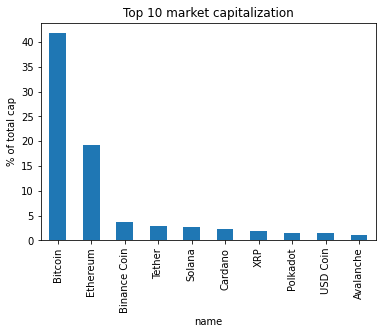

In [35]:
#Plotting the barplot with the title defined above 
ax = df['market_cap_dominance'][:10].plot.bar()
# Annotating the y axis with the label defined above
ax.set( title = 'Top 10 market capitalization' , ylabel='% of total cap');


In [36]:
# Calculating total price
df['total_volume_24h_perc'] = (df['volume_24h']/ df.volume_24h.sum()) *100
df['total_volume_24h_perc'] 

name
Bitcoin          17.568596
Ethereum          9.721307
Binance Coin      1.095043
Tether           38.707162
Solana            1.375370
                   ...    
Ravencoin         0.024326
Secret            0.010680
yearn.finance     0.103496
XDC Network       0.003057
Revain            0.001555
Name: total_volume_24h_perc, Length: 100, dtype: float64

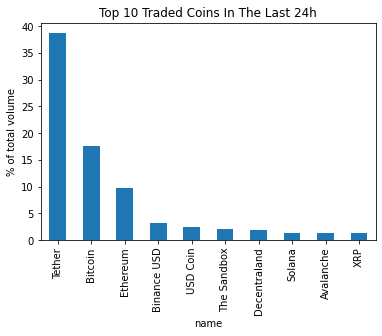

In [38]:
#Plotting the barplot with the title defined above 
ax = df['total_volume_24h_perc'].sort_values(ascending=False)[:10].plot.bar()
# Annotating the y axis with the label defined above
ax.set( title = 'Top 10 Traded Coins In The Last 24h' , ylabel='% of total volume');

#### Volatility in cryptocurrencies

The cryptocurrencies market has been spectacularly volatile since the first exchange opened.Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.

In [39]:
# Selecting the name, volume_change_24h and volume_change_7d columns
volatility = df[['volume_change_1h', 'volume_change_24h','volume_change_7d','volume_change_30d', 'volume_change_60d','volume_change_90d']]

# Setting the index to 'name' and dropping all NaN rows 

volatility = volatility.dropna()

# Sorting the DataFrame by volume_change_24h in ascending order
volatility = volatility.sort_values(by = "volume_change_24h" , ascending = True)


# Checking the first few rows
volatility.head(10)

,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d
name,,,,,,
ICON,0.518388,-8.945357,-14.348105,0.306955,24.094664,40.437331
Stacks,0.089211,-8.588104,-7.449359,-9.020590,51.670567,41.764778
Nexo,-1.851702,-5.705227,-17.352973,1.207031,79.939059,39.895110
Voyager Token,-0.771169,-5.607002,82.532733,108.860793,97.104376,33.711165
Flow,-0.461460,-5.327629,3.622234,-2.247469,-26.183970,-42.170178
Kusama,-0.099170,-4.711281,-13.485825,-15.326714,-3.890300,8.962572
Harmony,-2.007845,-3.576289,6.776787,-4.134933,85.120226,158.184573
Monero,-0.481132,-3.554510,-6.737440,-17.277330,-7.608099,-28.715288
WAX,-0.244757,-3.503620,5.060033,147.894655,221.494482,154.054904


#### Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.

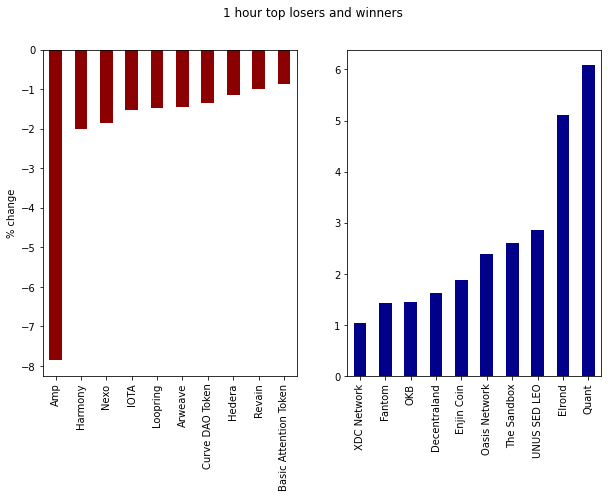

In [40]:
# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_1h.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "1 hour top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_1h.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");


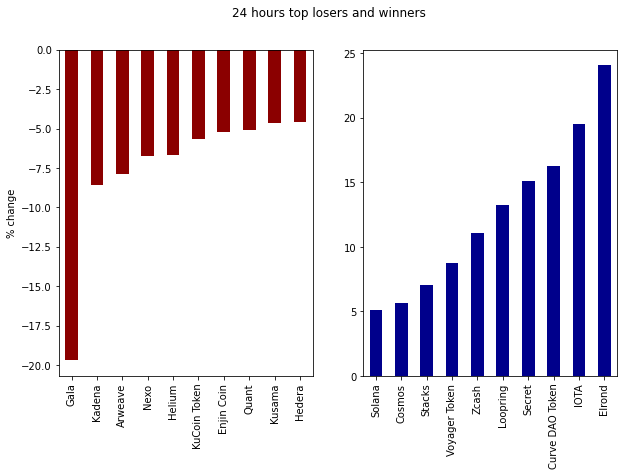

In [112]:
# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_24h[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "24 hours top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_24h[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

    
    

#### Lets check for  weekly 

Text(0.5, 0, '')

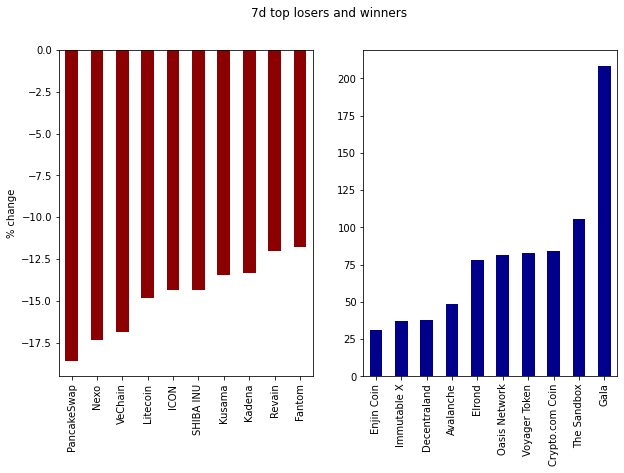

In [41]:
# Sorting the DataFrame by volume_change_24h in ascending order
volatility7d = volatility.sort_values(by = "volume_change_7d" , ascending = True)

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_7d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "7d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_7d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("")

**Top Gainers and Losers for 30 days**

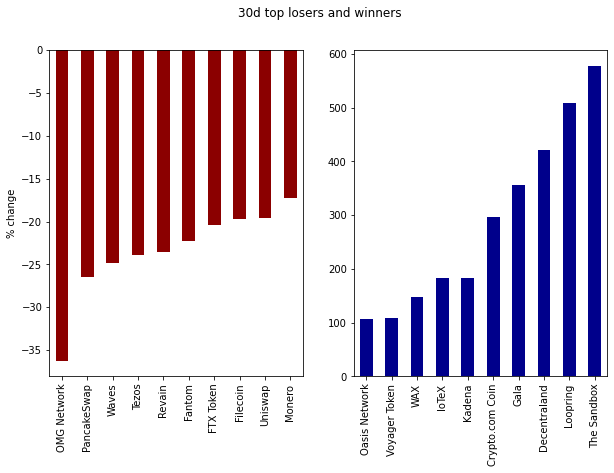

In [42]:


# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_30d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "30d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_30d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

**Top Gainers and Losers for 60 days**

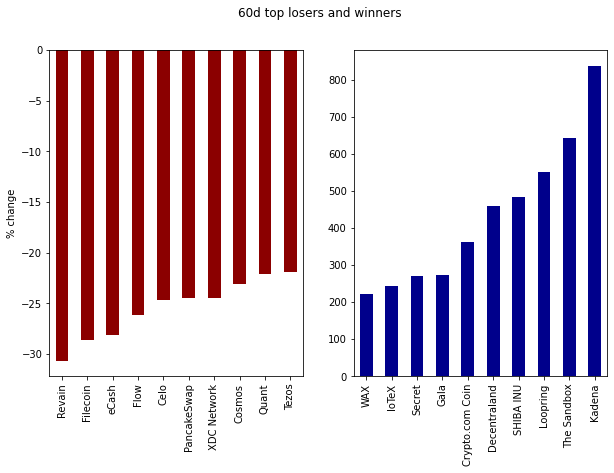

In [43]:

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_60d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "60d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_60d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("");

#### Lets check for 90days

Text(0.5, 0, '')

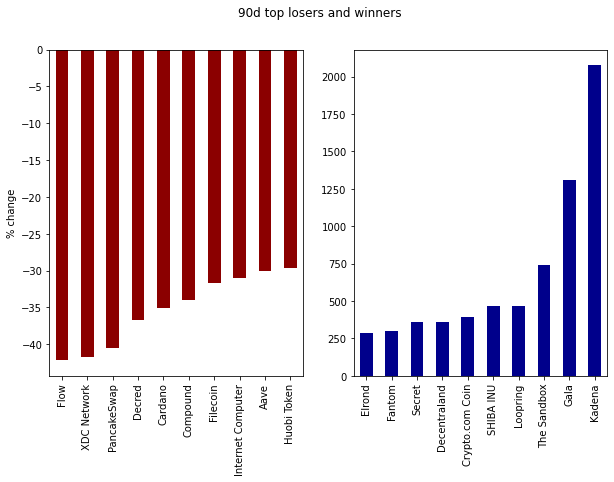

In [44]:
# Sorting the DataFrame by volume_change_24h in ascending order
volatility90d = volatility.sort_values(by = "volume_change_90d" , ascending = True)

# Making the subplot and the figure for two side by side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# Plotting with pandas the barchart for the top 10 losers
ax = (volatility.volume_change_90d.sort_values()[:10].plot.bar(color="darkred", ax=axes[0]))
# Setting the figure's main title to the text passed as parameter
fig.suptitle( "90d top losers and winners")
    
# Setting the ylabel to '% change'
ax.set_ylabel("% change")
ax.set_xlabel("")

# Same as above, but for the top 10 winners
ax = (volatility.volume_change_90d.sort_values()[-10:].plot.bar(color="darkblue", ax=axes[1]))
ax.set_xlabel("")

<AxesSubplot:>

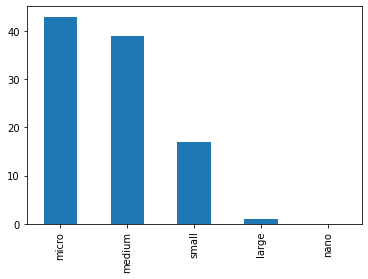

In [45]:
bins = [50000000,300000000,3000000000,5000000000,1000000000000,1500000000000] # 50M, 300M, 3B, 5B, 1000B, 1500B 
labels = ['nano','micro','small','medium','large']
df['cap'] = pd.cut(df['market_cap'],bins,labels=labels)
df['cap'].value_counts().plot(kind='bar')

In [46]:
df

,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,...,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username,total_volume_24h_perc,cap
name,,,,,,,,,,,,,,,,,,,,,
Bitcoin,2013-04-28,1,1.888078e+07,2021-11-23 06:49:02,56296.481490,3.505431e+10,-0.223573,-1.516004,-7.093745,-7.594197,...,16.327007,1.062921e+12,41.7568,1,Bitcoin (BTC) is a cryptocurrency . Users are ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://bitcoin.org/'], 'twitter...",,17.568596,large
Ethereum,2015-08-07,2,1.184526e+08,2021-11-23 06:49:02,4132.329103,1.939675e+10,-0.342432,-0.791871,-4.253560,0.882698,...,28.662212,4.894853e+11,19.2294,1027,Ethereum (ETH) is a cryptocurrency . Users are...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.ethereum.org/', 'htt...",ethereum,9.721307,medium
Binance Coin,2017-07-25,3,1.668011e+08,2021-11-23 06:48:27,565.601890,2.184920e+09,0.184911,-0.181085,-6.380471,17.387004,...,14.860199,9.434304e+10,3.7084,1839,Binance Coin (BNB) is a cryptocurrency . Binan...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.binance.com/'], 'twi...",binance,1.095043,medium
Tether,2015-02-25,4,7.635705e+10,2021-11-23 06:48:28,0.999164,7.723172e+10,-0.064624,-0.164098,-0.122583,-0.192741,...,-0.116288,7.243245e+10,2.8475,825,Tether (USDT) is a cryptocurrency and operates...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://tether.to'], 'twitter': ...",tether_to,38.707162,medium
Solana,2020-04-10,5,5.095996e+08,2021-11-23 06:49:05,216.891561,2.744252e+09,-0.331462,-0.687521,-3.800443,12.087803,...,200.570567,6.588684e+10,2.5891,5426,Solana (SOL) is a cryptocurrency launched in 2...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://solana.com'], 'twitter':...",solana,1.375370,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ravencoin,2018-03-10,96,1.014646e+10,2021-11-23 06:49:07,0.115139,4.853642e+07,0.013355,-1.968956,-2.485105,-5.804754,...,-15.895329,1.168251e+09,0.0459,2577,Ravencoin (RVN) is a cryptocurrency launched i...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://ravencoin.org/', 'https:...",ravencoin,0.024326,micro
Secret,2020-05-19,97,1.901651e+08,2021-11-23 06:49:07,7.788089,2.130970e+07,0.134492,-0.117178,14.007257,26.642950,...,359.294531,1.166778e+09,0.0459,5604,Secret (SCRT) is a cryptocurrency launched in ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://scrt.network'], 'twitter...",secretnetwork,0.010680,micro
yearn.finance,2020-07-18,98,3.666600e+04,2021-11-23 06:48:27,31520.564972,2.065040e+08,-0.469465,2.029080,-0.639133,-11.262104,...,-16.406438,1.154842e+09,0.0454,5864,yearn.finance (YFI) is a cryptocurrency and op...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://yearn.finance/'], 'twitt...",iearnfinance,0.103496,micro


In [47]:
df.drop(['date_added','last_updated'],axis=1,inplace=True)

In [48]:
df

,cmc_rank,total_supply,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username,total_volume_24h_perc,cap
name,,,,,,,,,,,,,,,,,,,
Bitcoin,1,1.888078e+07,56296.481490,3.505431e+10,-0.223573,-1.516004,-7.093745,-7.594197,27.253482,16.327007,1.062921e+12,41.7568,1,Bitcoin (BTC) is a cryptocurrency . Users are ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://bitcoin.org/'], 'twitter...",,17.568596,large
Ethereum,2,1.184526e+08,4132.329103,1.939675e+10,-0.342432,-0.791871,-4.253560,0.882698,34.627816,28.662212,4.894853e+11,19.2294,1027,Ethereum (ETH) is a cryptocurrency . Users are...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.ethereum.org/', 'htt...",ethereum,9.721307,medium
Binance Coin,3,1.668011e+08,565.601890,2.184920e+09,0.184911,-0.181085,-6.380471,17.387004,51.811298,14.860199,9.434304e+10,3.7084,1839,Binance Coin (BNB) is a cryptocurrency . Binan...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://www.binance.com/'], 'twi...",binance,1.095043,medium
Tether,4,7.635705e+10,0.999164,7.723172e+10,-0.064624,-0.164098,-0.122583,-0.192741,-0.109831,-0.116288,7.243245e+10,2.8475,825,Tether (USDT) is a cryptocurrency and operates...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://tether.to'], 'twitter': ...",tether_to,38.707162,medium
Solana,5,5.095996e+08,216.891561,2.744252e+09,-0.331462,-0.687521,-3.800443,12.087803,51.421200,200.570567,6.588684e+10,2.5891,5426,Solana (SOL) is a cryptocurrency launched in 2...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://solana.com'], 'twitter':...",solana,1.375370,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ravencoin,96,1.014646e+10,0.115139,4.853642e+07,0.013355,-1.968956,-2.485105,-5.804754,11.264866,-15.895329,1.168251e+09,0.0459,2577,Ravencoin (RVN) is a cryptocurrency launched i...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://ravencoin.org/', 'https:...",ravencoin,0.024326,micro
Secret,97,1.901651e+08,7.788089,2.130970e+07,0.134492,-0.117178,14.007257,26.642950,271.250920,359.294531,1.166778e+09,0.0459,5604,Secret (SCRT) is a cryptocurrency launched in ...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://scrt.network'], 'twitter...",secretnetwork,0.010680,micro
yearn.finance,98,3.666600e+04,31520.564972,2.065040e+08,-0.469465,2.029080,-0.639133,-11.262104,3.762410,-16.406438,1.154842e+09,0.0454,5864,yearn.finance (YFI) is a cryptocurrency and op...,https://s2.coinmarketcap.com/static/img/coins/...,"{'website': ['https://yearn.finance/'], 'twitt...",iearnfinance,0.103496,micro


#### Rolling Mean (Moving Average) & Bollinger bands — to determine a trend and volatilty 

A simple moving average, also called a rolling or running average is formed by computing the average price of a security over a specific number of periods. Most moving averages are based on closing prices; for example, a 5-day simple moving average is the five-day sum of closing prices divided by five. As its name implies, a moving average is an average that moves. Old data is dropped as new data becomes available, causing the average to move along the time scale

Bollinger bands are a type of technical indicator that allows traders to analyze the volatility of a stock and whether the price is high or low on a relative basis. The top band is typically two standard deviations above the SMA and the bottom band is typically two standard deviations below the SMA.

The easiest way to calculate the simple moving average is by using the pandas.Series.rolling method. This method provides rolling windows over the data.

In this analysis we will be using a window of 30 for the past 30 days of bitcoin and 2 standard deviations for the bollinger bands.

We will be using the Coingecko API as we are not able to get historical data from CoinMarketCap.

In [51]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()


In [52]:
bitcoin_price = cg.get_coin_market_chart_by_id('bitcoin','usd','30')
bit_time = [i[0] for i in bitcoin_price['prices']]
bit_prices = [i[1] for i in bitcoin_price['prices']]
bit_market_caps = [i[1] for i in bitcoin_price['market_caps']]
bit_total_volumes = [i[1] for i in bitcoin_price['total_volumes']]

In [53]:
bitcoin_price

{'prices': [[1635062432026, 61076.955607014665],
  [1635066105919, 60888.9278409195],
  [1635069671173, 61057.215708473406],
  [1635073352594, 61177.390706994294],
  [1635076930234, 60265.27366131045],
  [1635080609101, 60452.84276221011],
  [1635084216791, 60531.78422608048],
  [1635087779438, 60171.631919271116],
  [1635091305549, 60243.10740230382],
  [1635094955345, 60320.656314553424],
  [1635098692437, 60246.16996838899],
  [1635102006262, 60182.8088390515],
  [1635105674389, 60560.56493099557],
  [1635109937616, 61315.38278642506],
  [1635112844560, 60921.603746009736],
  [1635116690227, 61201.28453705165],
  [1635120598596, 61119.93510737243],
  [1635124260085, 62286.5615746017],
  [1635128053926, 62087.749288904575],
  [1635131457124, 62310.93042741927],
  [1635134952717, 62282.31420959382],
  [1635138287803, 62114.76416533854],
  [1635141655830, 62160.49901245171],
  [1635145276829, 62470.149147100165],
  [1635149000838, 62990.953666070454],
  [1635152503962, 63029.0903210059

In [54]:
cg_df = pd.DataFrame({'time':bit_time,'price':bit_prices,'market_caps':bit_market_caps,'total_volumes':bit_total_volumes})
cg_df['time'] = pd.to_datetime((cg_df['time']/1000),unit='s')

In [55]:
cg_df = cg_df.set_index('time')

In [56]:
cg_df['ma_rolling_30-Day'] = cg_df.price.rolling(window=30).mean()
cg_df['std'] = cg_df.price.rolling(window=30).std()
cg_df['upper'] = cg_df['ma_rolling_30-Day'] + 2*cg_df['std']
cg_df['lower'] = cg_df['ma_rolling_30-Day']- 2*cg_df['std']
cg_df

,price,market_caps,total_volumes,ma_rolling_30-Day,std,upper,lower
time,,,,,,,
2021-10-24 08:00:32.026000128,61076.955607,1.152721e+12,2.727845e+10,NaN,NaN,NaN,NaN
2021-10-24 09:01:45.918999808,60888.927841,1.147918e+12,2.704528e+10,NaN,NaN,NaN,NaN
2021-10-24 10:01:11.173000192,61057.215708,1.151094e+12,2.723940e+10,NaN,NaN,NaN,NaN
2021-10-24 11:02:32.594000128,61177.390707,1.153612e+12,2.662495e+10,NaN,NaN,NaN,NaN
2021-10-24 12:02:10.233999872,60265.273661,1.136169e+12,2.577245e+10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-11-23 04:03:51.084999936,57120.636173,1.078481e+12,3.468287e+10,57416.137026,869.396836,59154.930697,55677.343354
2021-11-23 05:02:59.107000064,56925.924878,1.075684e+12,3.431750e+10,57334.906478,791.601894,58918.110266,55751.702690
2021-11-23 06:13:09.864999936,56541.739768,1.066786e+12,3.411393e+10,57248.305161,726.800432,58701.906024,55794.704297


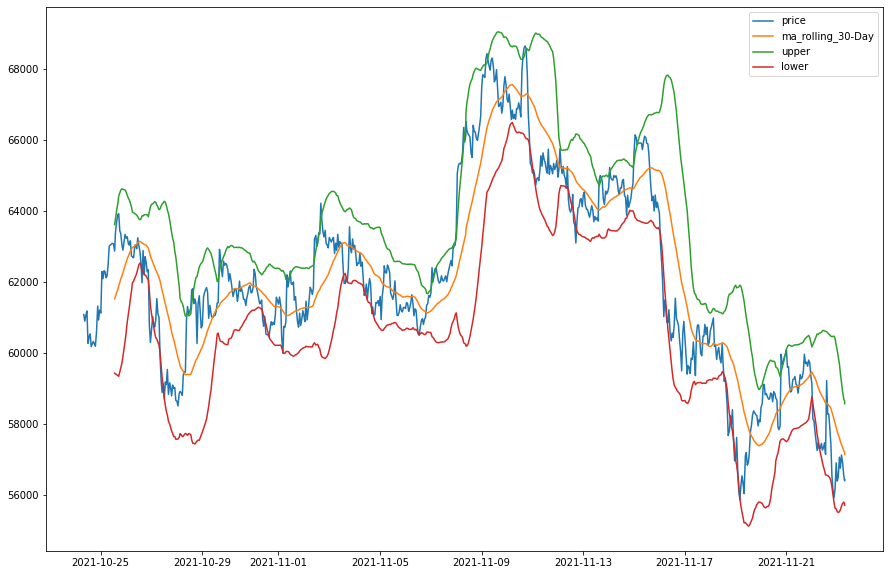

In [57]:
plt.figure(figsize=(15,10))

plt.plot(cg_df[['price','ma_rolling_30-Day','upper','lower']])
plt.legend(['price','ma_rolling_30-Day','upper','lower']);

In [58]:
df1

,name,date_added,cmc_rank,total_supply,last_updated,price,volume_24h,volume_change_1h,volume_change_24h,volume_change_7d,volume_change_30d,volume_change_60d,volume_change_90d,market_cap,market_cap_dominance,id,description,logo,urls,twitter_username
0,Bitcoin,2013-04-28,1,1.888078e+07,2021-11-23 06:49:02,56296.481490,3.505431e+10,-0.223573,-1.516004,-7.093745,-7.594197,27.253482,16.327007,1.062921e+12,41.7568,1,"Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,880,775. The last known price of Bitcoin is 56,378.08911788 USD and is down -1.62 over the last 24 hours. It is currently trading on 8321 active market(s) with $35,092,119,079.60 traded over the last 24 hours. More information can be found at https://bitcoin.org/.",,"{'website': ['https://bitcoin.org/'], 'twitter': [], 'message_board': ['https://bitcointalk.org'], 'chat': [], 'facebook': [], 'explorer': ['https://blockchain.coinmarketcap.com/chain/bitcoin', 'https://blockchain.info/', 'https://live.blockcypher.com/btc/', 'https://blockchair.com/bitcoin', 'https://explorer.viabtc.com/btc'], 'reddit': ['https://reddit.com/r/bitcoin'], 'technical_doc': ['https://bitcoin.org/bitcoin.pdf'], 'source_code': ['https://github.com/bitcoin/bitcoin'], 'announcement': []}",
1,Ethereum,2015-08-07,2,1.184526e+08,2021-11-23 06:49:02,4132.329103,1.939675e+10,-0.342432,-0.791871,-4.253560,0.882698,34.627816,28.662212,4.894853e+11,19.2294,1027,"Ethereum (ETH) is a cryptocurrency . Users are able to generate ETH through the process of mining. Ethereum has a current supply of 118,452,643.0615. The last known price of Ethereum is 4,136.99286777 USD and is down -0.94 over the last 24 hours. It is currently trading on 4668 active market(s) with $19,403,005,562.54 traded over the last 24 hours. More information can be found at https://www.ethereum.org/.",,"{'website': ['https://www.ethereum.org/', 'https://en.wikipedia.org/wiki/Ethereum'], 'twitter': ['https://twitter.com/ethereum'], 'message_board': ['https://forum.ethereum.org/', 'https://ethresear.ch/'], 'chat': ['https://gitter.im/orgs/ethereum/rooms'], 'facebook': [], 'explorer': ['https://etherscan.io/', 'https://ethplorer.io/', 'https://blockchair.com/ethereum', 'https://bscscan.com/token/0x2170ed0880ac9a755fd29b2688956bd959f933f8', 'https://eth.tokenview.com/en/blocklist'], 'reddit': ['https://reddit.com/r/ethereum'], 'technical_doc': ['https://github.com/ethereum/wiki/wiki/White-Paper'], 'source_code': ['https://github.com/ethereum'], 'announcement': ['https://bitcointalk.org/index.php?topic=428589.0']}",ethereum
2,Binance Coin,2017-07-25,3,1.668011e+08,2021-11-23 06:48:27,565.601890,2.184920e+09,0.184911,-0.181085,-6.380471,17.387004,51.811298,14.860199,9.434304e+10,3.7084,1839,"Binance Coin (BNB) is a cryptocurrency . Binance Coin has a current supply of 166,801,148. The last known price of Binance Coin is 565.36475318 USD and is down -0.39 over the last 24 hours. It is currently trading on 564 active market(s) with $2,234,323,567.44 traded over the last 24 hours. More information can be found at https://www.binance.com/.",,"{'website': ['https://www.binance.com/'], 'twitter': ['https://twitter.com/binance'], 'message_board': [], 'chat': ['https://t.me/binanceexchange'], 'facebook': [], 'explorer': ['https://explorer.binance.org/', 'https://etherscan.io/token/0xB8c77482e45F1F44dE1745F52C74426C631bDD52', 'https://bscscan.com/token/0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c', 'https://blockchair.com/ethereum/erc-20/token/0xb8c77482e45f1f44de1745f52c74426c631bdd52'], 'reddit': ['https://reddit.com/r/binance'], 'technical_doc': [], 'source_code': [], 'announcement': []}",binance
3,Tether,2015-02-25,4,7.635705e+10,2021-11-23 06:48:28,0.999164,7.723172e+10,-0.064624,-0.164098,-0.122583,-0.192741,-0.109831,-0.116288,7.243245e+10,2.8475,825,"Tether (USDT) is a cryptocurrency and operates on the Ethereum platform. Tether has a current supply of 76,357,051,672.06